# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid")

# Load Dataset

In [2]:

file_path = "dataset.csv"

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "left")

data.head()



,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Age Group,Driver Gender,Driver Alcohol Level,Driver Fatigue,Vehicle Condition,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,37,18-25,Male,0.051921,0,Poor,1,2,Moderate,8,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,96,18-25,Female,0.234893,1,Poor,1,1,Minor,6,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,62,41-60,Male,0.142366,0,Moderate,0,0,Moderate,13,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,78,18-25,Male,0.120815,1,Good,2,0,Minor,6,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,98,41-60,Male,0.155842,1,Poor,0,1,Moderate,13,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [3]:
data.dtypes

Country                         object
Year                             int64
Month                           object
Day of Week                     object
Time of Day                     object
Urban/Rural                     object
Road Type                       object
Weather Conditions              object
Visibility Level               float64
Number of Vehicles Involved      int64
Speed Limit                      int64
Driver Age Group                object
Driver Gender                   object
Driver Alcohol Level           float64
Driver Fatigue                   int64
Vehicle Condition               object
Pedestrians Involved             int64
Cyclists Involved                int64
Accident Severity               object
Number of Injuries               int64
Number of Fatalities             int64
Emergency Response Time        float64
Traffic Volume                 float64
Road Condition                  object
Accident Cause                  object
Insurance Claims         

# Clean Data

In [4]:
##  CHECK FOR MISSING VALUES
data.isnull().sum()
data.duplicated().sum()
#Clean Data and remove missing values
data = data.dropna()



# Display Data

In [5]:
numeric_cols = data.select_dtypes(include=['number']).columns

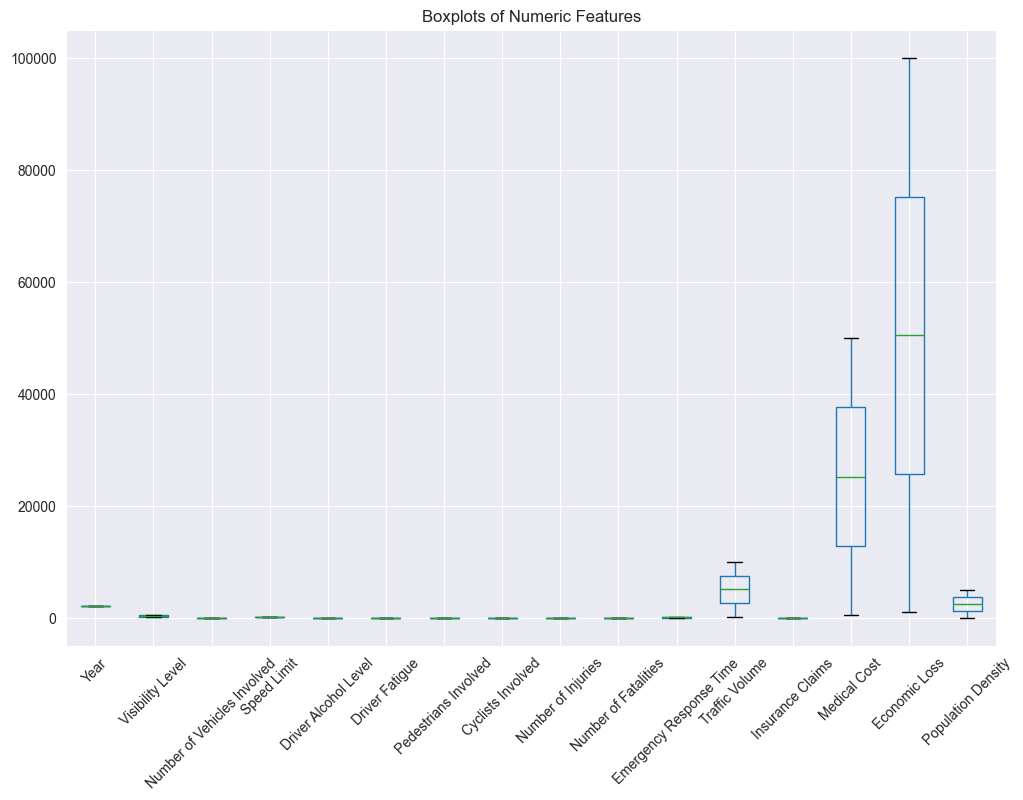

In [6]:
# Boxplots
plt.figure(figsize=(12, 8))
data[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numeric Features")
plt.show()

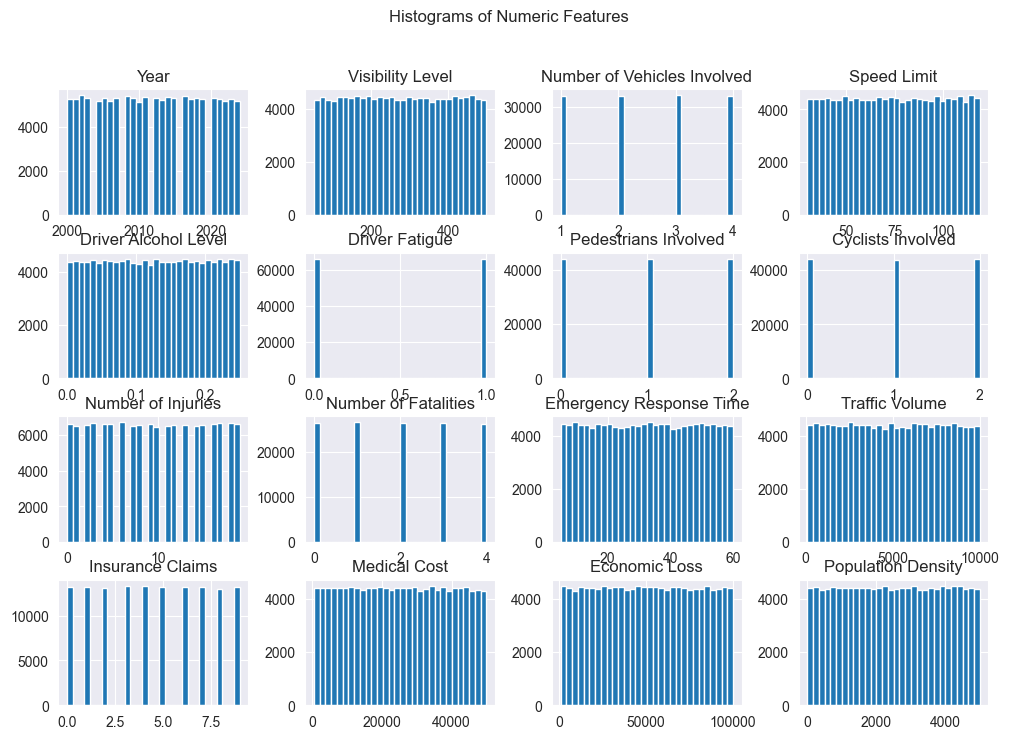

In [7]:
# Histograms
data[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

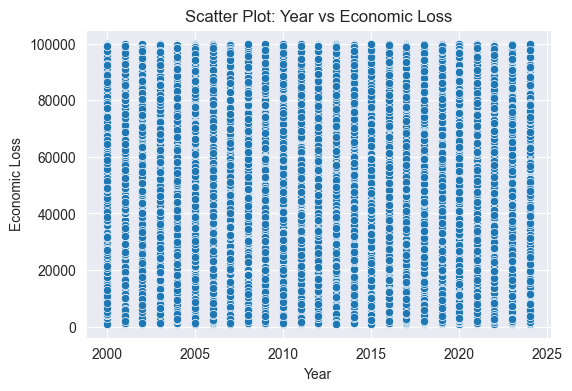

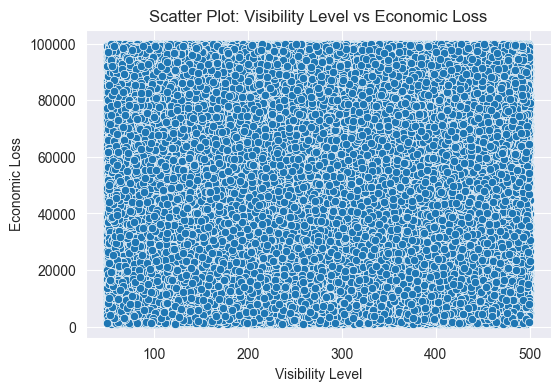

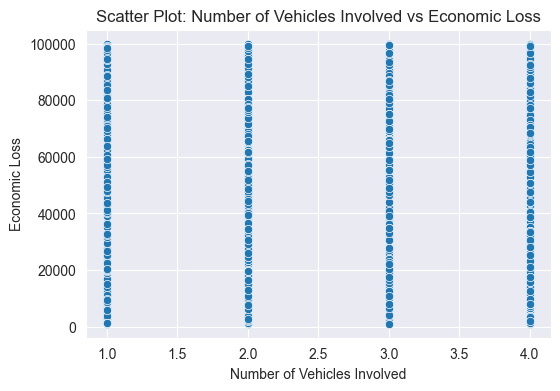

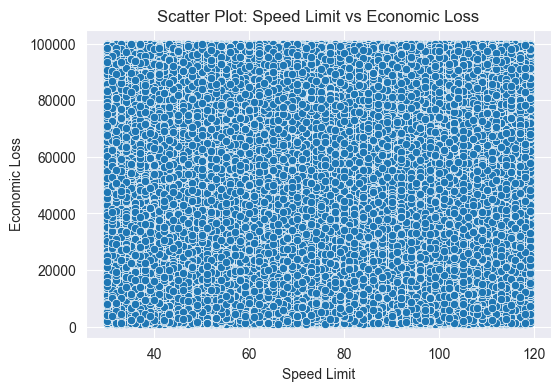

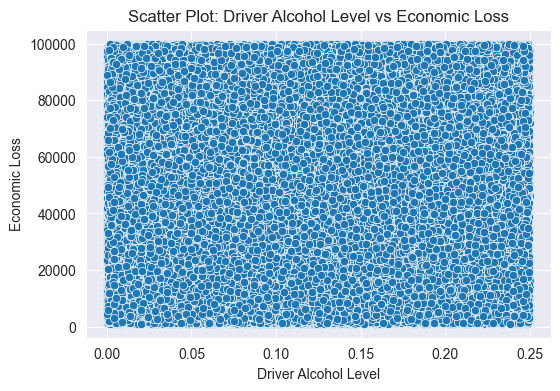

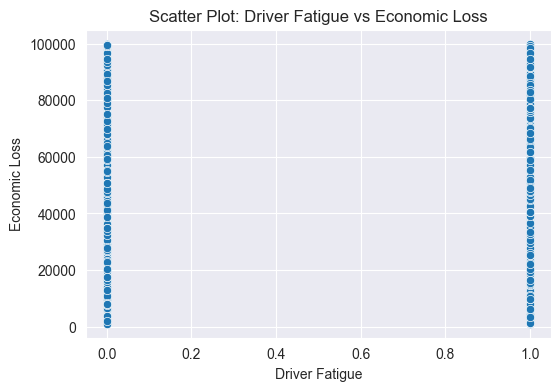

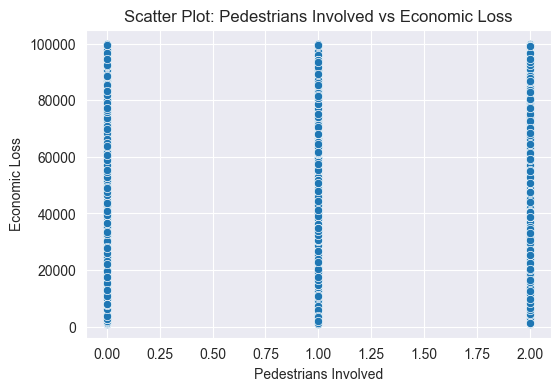

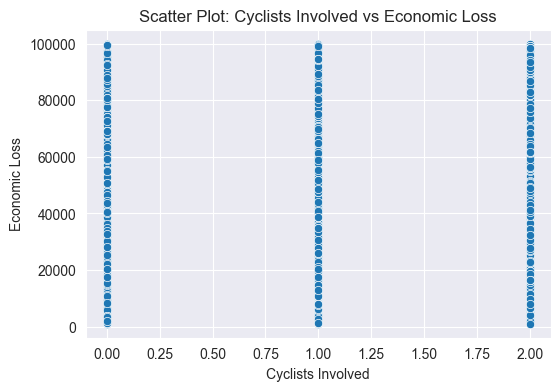

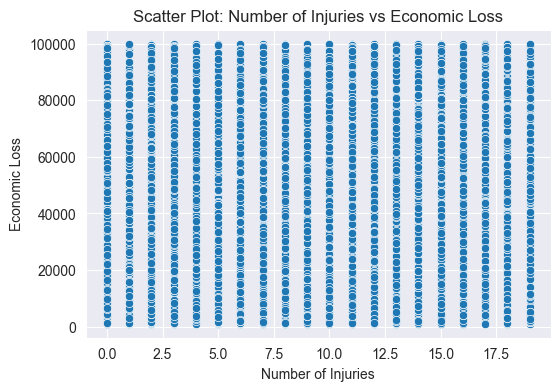

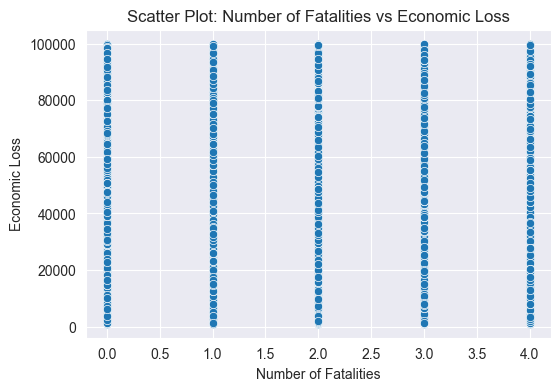

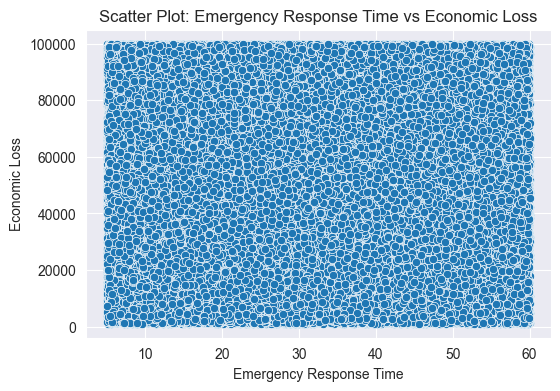

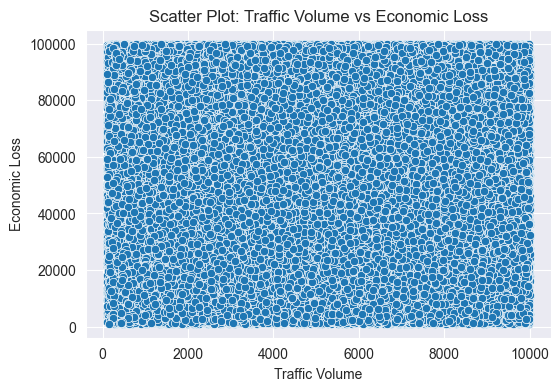

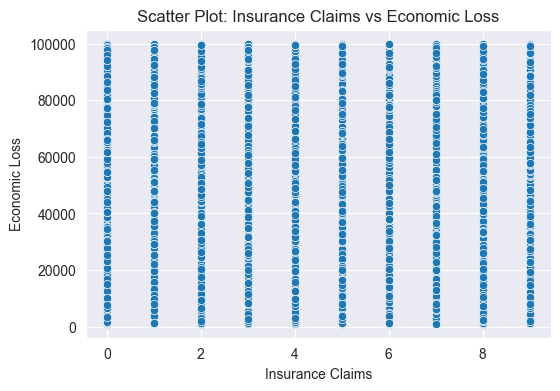

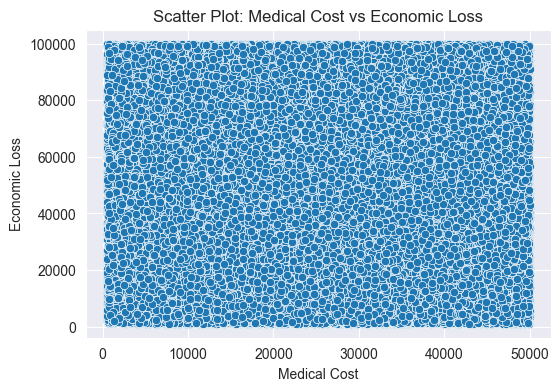

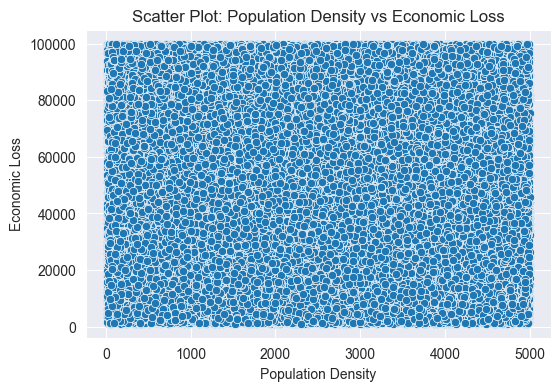

In [8]:
# Scatter plots against 'Economic Loss'
if 'Economic Loss' in numeric_cols:
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_cols):
        if col != "Economic Loss":
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=data[col], y=data["Economic Loss"])
            plt.xlabel(col)
            plt.ylabel("Economic Loss")
            plt.title(f"Scatter Plot: {col} vs Economic Loss")
            plt.show()
else:
    print("'Economic Loss' column not found in numeric columns.")

# Relation

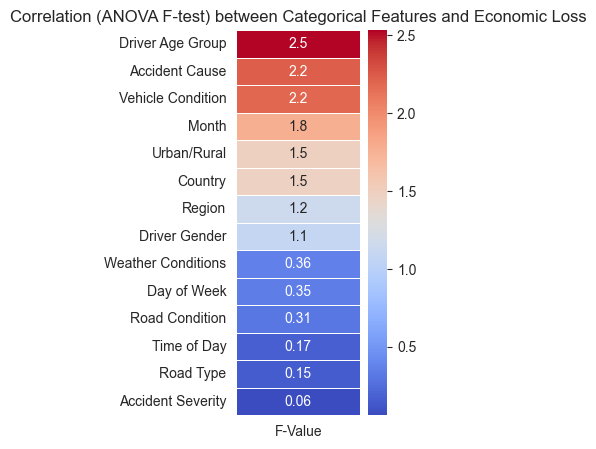

In [9]:
categorical_columns = ['Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Gender',
                        'Road Condition', 'Accident Cause',  'Region', 'Driver Age Group', 'Vehicle Condition', 'Accident Severity']


# Higher F-value indicates stronger correlation

def anova_f_test(df, categorical_cols, target):
    results = {}
    for col in categorical_cols:
        groups = [df[target][df[col] == category] for category in df[col].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        results[col] = f_val
    return results

correlation_dict = anova_f_test(data, categorical_columns, 'Economic Loss')

correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['F-Value'])
correlation_df = correlation_df.sort_values(by='F-Value', ascending=False)


plt.figure(figsize=(2, 5))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation (ANOVA F-test) between Categorical Features and Economic Loss")
plt.show()



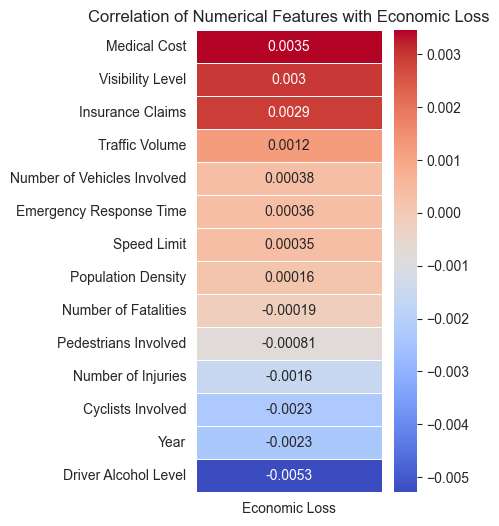

In [10]:

numerical_columns = ['Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit',
                     'Driver Alcohol Level', 'Pedestrians Involved', 'Cyclists Involved',
                     'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time',
                     'Traffic Volume', 'Medical Cost', 'Insurance Claims', 'Population Density']

cols_to_consider = numerical_columns + ['Economic Loss']

corr_matrix = data[cols_to_consider].corr()

economic_loss_corr = corr_matrix[['Economic Loss']].drop('Economic Loss').sort_values(by='Economic Loss', ascending=False)

plt.figure(figsize=(3, 6))
sns.heatmap(economic_loss_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Economic Loss")
plt.show()


# Feature Selection

In [11]:
selected_cols = [
     'Economic Loss',

    # Numerical Features
    'Medical Cost', 'Visibility Level', 'Insurance Claims', 'Traffic Volume',
    # Categorical Features (One-Hot Encoded)
    'Driver Age Group', 'Accident Cause', 'Vehicle Condition',
    'Month', 'Urban/Rural', 'Country'
]


# Create a new DataFrame with selected columns
data_selected = data[selected_cols].copy(5000)

# Display the first few rows to verify
data_selected.head()




,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Accident Cause,Vehicle Condition,Month,Urban/Rural,Country
0,22072.878502,40499.856982,220.414651,4,7412.752760,18-25,Weather,Poor,October,Rural,USA
1,9534.399441,6486.600073,168.311358,3,4458.628820,18-25,Mechanical Failure,Poor,December,Urban,UK
2,58009.145124,29164.412982,341.286506,4,9856.915064,41-60,Speeding,Moderate,July,Urban,USA
3,20907.151302,25797.212566,489.384536,3,4958.646267,18-25,Distracted Driving,Good,May,Urban,UK
4,13584.060759,15605.293921,348.344850,8,3843.191463,41-60,Distracted Driving,Poor,July,Rural,Canada


# One Hot Encoding & Label Encoding

In [12]:

ohe_categorical_columns = ['Country', 'Month', 'Urban/Rural', 'Accident Cause']

le_categorical_columns = ['Driver Age Group', 'Vehicle Condition']

data_selected[le_categorical_columns].apply(lambda col: col.unique())


Driver Age Group     [18-25, 41-60, 26-40, <18, 61+]
Vehicle Condition             [Poor, Moderate, Good]
dtype: object

In [13]:
#Label Encoding

driver_age_mapping = {"<18": 0, "18-25": 1, "26-40": 2, "41-60": 3, "61+": 4}
vehicle_condition_mapping = {"Poor": 0, "Moderate": 1, "Good": 2}

# Apply the mappings to the DataFrame
data_selected["Driver Age Group"] = data_selected["Driver Age Group"].map(driver_age_mapping)
data_selected["Vehicle Condition"] = data_selected["Vehicle Condition"].map(vehicle_condition_mapping)

# Check the transformed data
data_selected.head()


,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Accident Cause,Vehicle Condition,Month,Urban/Rural,Country
0,22072.878502,40499.856982,220.414651,4,7412.752760,1,Weather,0,October,Rural,USA
1,9534.399441,6486.600073,168.311358,3,4458.628820,1,Mechanical Failure,0,December,Urban,UK
2,58009.145124,29164.412982,341.286506,4,9856.915064,3,Speeding,1,July,Urban,USA
3,20907.151302,25797.212566,489.384536,3,4958.646267,1,Distracted Driving,2,May,Urban,UK
4,13584.060759,15605.293921,348.344850,8,3843.191463,3,Distracted Driving,0,July,Rural,Canada


In [14]:
data_selected = pd.get_dummies(data_selected, columns=ohe_categorical_columns)

data_selected.head()


,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Vehicle Condition,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Urban/Rural_Rural,Urban/Rural_Urban,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather
0,22072.878502,40499.856982,220.414651,4,7412.752760,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,9534.399441,6486.600073,168.311358,3,4458.628820,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,58009.145124,29164.412982,341.286506,4,9856.915064,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,20907.151302,25797.212566,489.384536,3,4958.646267,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False
4,13584.060759,15605.293921,348.344850,8,3843.191463,3,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False


# Normalization

In [15]:

numerical_columns = [
    'Visibility Level',
    'Traffic Volume',
    'Medical Cost',
]


# Standardize each numerical column (mean=0, std=1)

mean_values = data_selected[numerical_columns].mean()
std_values = data_selected[numerical_columns].std()
data_selected[numerical_columns] = (data_selected[numerical_columns] - mean_values) / std_values


# Min-Max Scaling to range [0, 1]

# for col in numerical_columns:
#     min_val = data[col].min()
#     max_val = data[col].max()
#     data[col] = (data[col] - min_val) / (max_val - min_val)  # Apply Min-Max scaling


data_selected.head()



,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Vehicle Condition,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Urban/Rural_Rural,Urban/Rural_Urban,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather
0,22072.878502,1.071919,-0.420433,4,0.828765,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,9534.399441,-1.310834,-0.821463,3,-0.203903,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,58009.145124,0.277830,0.509897,4,1.683166,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,20907.151302,0.041945,1.649783,3,-0.029113,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False
4,13584.060759,-0.672036,0.564224,8,-0.419041,3,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False


# Define X(features) and y(target variable) and set Hyper parameters

In [16]:
# Define features (X) and target variable (y)
X = data_selected.drop(columns=['Economic Loss']).values  # Convert to NumPy array
y = data_selected['Economic Loss'].values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Add bias term (intercept) to X
X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of ones for the intercept

# Define train-test split ratio
train_ratio = 0.8

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Determine the split index
split_index = int(train_ratio * X.shape[0])

# Split the data into training and testing sets
X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

# Check shapes of train and test sets
print(f"Train set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set size: X_test = {X_test.shape}, y_test = {y_test.shape}")




Train set size: X_train = (105600, 36), y_train = (105600, 1)
Test set size: X_test = (26400, 36), y_test = (26400, 1)


In [17]:
# Hyperparameters
learning_rate = 0.01
epochs = 500  # Number of iterations
m = len(y_train) # Number of samples


# Initialize weights (theta) randomly
theta = np.random.randn(X_train.shape[1], 1)

In [18]:
# Display X with bias term
columns = ['Bias'] + list(data_selected.drop(columns=['Economic Loss']).columns)  # Add column names
X_df = pd.DataFrame(X, columns=columns)
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimal places
print(X_df.head(10))  # Show first 10 rows neatly

  Bias   Medical Cost Visibility Level Insurance Claims Traffic Volume Driver Age Group Vehicle Condition Country_Australia Country_Brazil Country_Canada Country_China Country_Germany Country_India Country_Japan Country_Russia Country_UK Country_USA Month_April Month_August Month_December Month_February Month_January Month_July Month_June Month_March Month_May Month_November Month_October Month_September Urban/Rural_Rural Urban/Rural_Urban Accident Cause_Distracted Driving Accident Cause_Drunk Driving Accident Cause_Mechanical Failure Accident Cause_Speeding Accident Cause_Weather
0 1.0000  1.0719      -0.4204           4                0.8288         1                0                 False             False          False          False         False           False         False         False          False       True       False       False        False          False          False         False      False      False       False     False           True         False            Tr

# Training

In [19]:
# Batch Gradient Descent (BGD)
loss_history_bgd = []
theta_bgd = np.copy(theta)

for epoch in range(epochs):
    y_pred = np.dot(X_train, theta_bgd)
    error = y_pred - y_train
    gradients = (1 / m) * np.dot(X_train.T, error)
    theta_bgd -= learning_rate * gradients.astype(np.float64)

    mse = np.mean(error ** 2)
    loss_history_bgd.append(mse)

    if epoch % 100 == 0:
        print(f"BGD Epoch {epoch}: MSE = {mse}")

BGD Epoch 0: MSE = 3362045143.6432347
BGD Epoch 100: MSE = 996736971.6088694
BGD Epoch 200: MSE = 922495300.839529
BGD Epoch 300: MSE = 882074262.802143
BGD Epoch 400: MSE = 857708252.0962957


In [20]:
# Stochastic Gradient Descent (SGD)
loss_history_sgd = []
theta_sgd = np.copy(theta)

for epoch in range(epochs):
    for i in range(m):
        rand_index = np.random.randint(m)  
        X_sample = X_train[rand_index].reshape(1, -1)
        y_sample = y_train[rand_index].reshape(-1, 1)

        y_pred = np.dot(X_sample, theta_sgd)
        error = y_pred - y_sample
        gradients = X_sample.T @ error
        theta_sgd -= learning_rate * gradients.astype(np.float64)

    mse = np.mean((np.dot(X_train, theta_sgd) - y_train) ** 2)
    loss_history_sgd.append(mse)

    if epoch % 100 == 0:
        print(f"SGD Epoch {epoch}: MSE = {mse}")

SGD Epoch 0: MSE = 876104113.4128919
SGD Epoch 100: MSE = 990402645.1819147
SGD Epoch 200: MSE = 920888724.1110543
SGD Epoch 300: MSE = 1156882404.677175
SGD Epoch 400: MSE = 1502922142.005239


In [21]:
# Mini-Batch Gradient Descent (MBGD)

batch_sizes = [16, 32, 64]  # Different batch sizes
loss_histories = {}  # Store loss history for each batch size

for batch_size in batch_sizes:
    theta_mbgd = np.copy(theta)  # Reset theta for each batch size
    loss_history = []

    print(f"\nBatch Size {batch_size}")
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            y_pred = np.dot(X_batch, theta_mbgd)
            error = y_pred - y_batch
            gradients = (1 / batch_size) * np.dot(X_batch.T, error)
            theta_mbgd -= learning_rate * gradients.astype(np.float64)

        mse = np.mean((np.dot(X_train, theta_mbgd) - y_train) ** 2)
        loss_history.append(mse)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {mse}")


    loss_histories[batch_size] = loss_history  # Store loss history



Batch Size 16
Epoch 0: MSE = 818075894.3783592
Epoch 100: MSE = 818077088.6167613
Epoch 200: MSE = 818077088.6167617
Epoch 300: MSE = 818077088.6167613
Epoch 400: MSE = 818077088.6167616

Batch Size 32
Epoch 0: MSE = 817611202.7144295
Epoch 100: MSE = 817611286.746196
Epoch 200: MSE = 817611286.746196
Epoch 300: MSE = 817611286.7461958
Epoch 400: MSE = 817611286.746196

Batch Size 64
Epoch 0: MSE = 817534118.4407378
Epoch 100: MSE = 817358883.7891611
Epoch 200: MSE = 817358883.7891612
Epoch 300: MSE = 817358883.7891611
Epoch 400: MSE = 817358883.7891612


In [22]:
import numpy as np

# Print final theta values for each batch size
for batch_size, loss in loss_histories.items():
    print(f"Final theta for batch size {batch_size}:\n", theta_mbgd)


Final theta for batch size 16:
 [[ 2.66173718e+04]
 [ 4.19072227e+02]
 [-1.17907379e+02]
 [-1.98501413e+01]
 [ 1.89152797e+02]
 [-1.23013094e+00]
 [ 1.46852057e+02]
 [ 2.03946207e+03]
 [ 2.82520698e+03]
 [ 3.26269192e+03]
 [ 3.05242023e+03]
 [ 2.70336884e+03]
 [ 2.66649428e+03]
 [ 2.27139518e+03]
 [ 2.41963197e+03]
 [ 3.05516910e+03]
 [ 2.32278383e+03]
 [ 2.24274161e+03]
 [ 1.70112338e+03]
 [ 2.11108784e+03]
 [ 2.52996325e+03]
 [ 2.73654566e+03]
 [ 1.86530740e+03]
 [ 2.18787621e+03]
 [ 2.81584985e+03]
 [ 2.64303478e+03]
 [ 1.72650797e+03]
 [ 2.12587744e+03]
 [ 1.92828170e+03]
 [ 1.35180865e+04]
 [ 1.30998436e+04]
 [ 4.96209655e+03]
 [ 5.65958801e+03]
 [ 5.46852611e+03]
 [ 4.91703608e+03]
 [ 5.61226759e+03]]
Final theta for batch size 32:
 [[ 2.66173718e+04]
 [ 4.19072227e+02]
 [-1.17907379e+02]
 [-1.98501413e+01]
 [ 1.89152797e+02]
 [-1.23013094e+00]
 [ 1.46852057e+02]
 [ 2.03946207e+03]
 [ 2.82520698e+03]
 [ 3.26269192e+03]
 [ 3.05242023e+03]
 [ 2.70336884e+03]
 [ 2.66649428e+03]
 [ 2

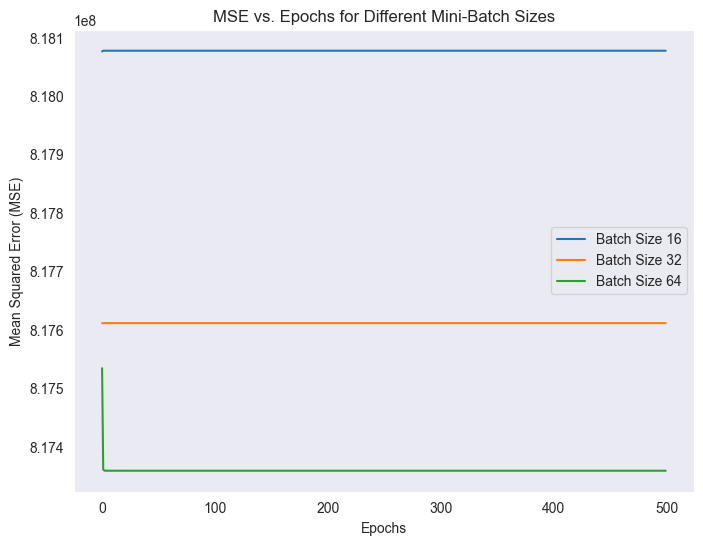

In [23]:
# Plot loss curves for different batch sizes
plt.figure(figsize=(8, 6))

for batch_size, loss_history in loss_histories.items():
    plt.plot(range(epochs), loss_history, label=f"Batch Size {batch_size}")

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Epochs for Different Mini-Batch Sizes")
plt.legend()
plt.grid()
plt.show()


In [24]:
print("Batch Gradient Descent Weights:\n", theta_bgd)
print("Stochastic Gradient Descent Weights:\n", theta_sgd)
print("Mini-Batch Gradient Descent Weights:\n", theta_mbgd)

Batch Gradient Descent Weights:
 [[19675.58332079]
 [   26.95043312]
 [   32.68531728]
 [  972.3427845 ]
 [  124.39118706]
 [ 1868.92511807]
 [ 3642.71648584]
 [ 1659.07962667]
 [ 2068.66876886]
 [ 2256.24328398]
 [ 2122.54515559]
 [ 1977.01571796]
 [ 2009.64523799]
 [ 1682.65392456]
 [ 1908.65050628]
 [ 2154.72541897]
 [ 1837.60828333]
 [ 1607.69121804]
 [ 1483.44304527]
 [ 1620.44041405]
 [ 1786.45651533]
 [ 1805.09406286]
 [ 1495.44510832]
 [ 1591.71090865]
 [ 1853.25279423]
 [ 1735.25030001]
 [ 1468.83268373]
 [ 1623.6958361 ]
 [ 1601.09572488]
 [ 9777.3110804 ]
 [ 9898.83051243]
 [ 3781.87213938]
 [ 4154.8052722 ]
 [ 3877.84941234]
 [ 3811.88438333]
 [ 4051.31466507]]
Stochastic Gradient Descent Weights:
 [[ 2.73589962e+04]
 [ 3.95109283e+03]
 [ 3.90104520e+03]
 [ 3.88986075e+03]
 [-1.45702447e+03]
 [ 3.04688379e+03]
 [-1.33852222e+03]
 [ 4.22946982e+02]
 [ 9.38706647e+03]
 [ 2.87366910e+03]
 [ 4.37865895e+03]
 [-1.16869233e+03]
 [ 2.84219477e+03]
 [-2.10899411e+01]
 [ 1.43767940e

In [25]:
# Evaluate on Test Set
print("\nFinal Training MSE for different Mini-Batch Sizes:")
for batch_size, loss_history in loss_histories.items():
    print(f"Batch Size {batch_size}: MSE = {loss_history[-1]}")

# Evaluate on Test Set
y_pred_test_bgd = np.dot(X_test, theta_bgd)
mse_test_bgd = np.mean((y_pred_test_bgd - y_test) ** 2)

y_pred_test_sgd = np.dot(X_test, theta_sgd)
mse_test_sgd = np.mean((y_pred_test_sgd - y_test) ** 2)

y_pred_test_mbgd = np.dot(X_test, theta_mbgd)
mse_test_mbgd = np.mean((y_pred_test_mbgd - y_test) ** 2)

print("\nTest MSE for each method:")
print(f"Batch Gradient Descent Test MSE: {mse_test_bgd}")
print(f"Stochastic Gradient Descent Test MSE: {mse_test_sgd}")
print(f"Mini-Batch Gradient Descent Test MSE: {mse_test_mbgd}")


Final Training MSE for different Mini-Batch Sizes:
Batch Size 16: MSE = 818077088.6167613
Batch Size 32: MSE = 817611286.746196
Batch Size 64: MSE = 817358883.7891611

Test MSE for each method:
Batch Gradient Descent Test MSE: 842320741.291056
Stochastic Gradient Descent Test MSE: 1559034786.3589017
Mini-Batch Gradient Descent Test MSE: 816578282.1745251


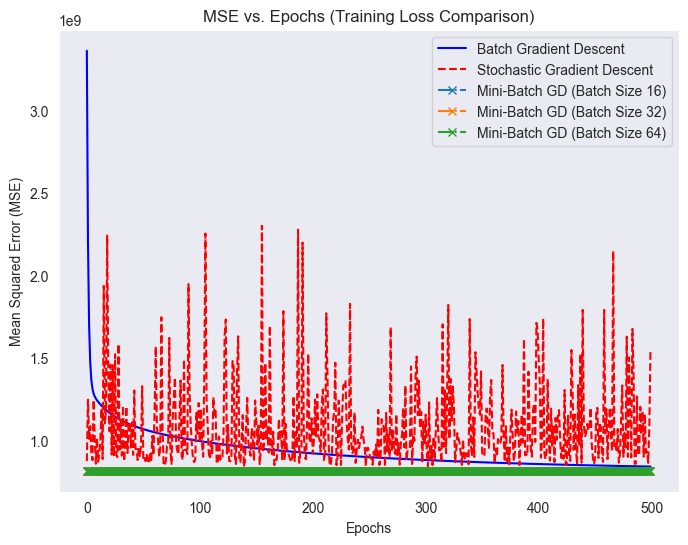

In [26]:
import matplotlib.pyplot as plt

# Plot MSE vs. Epochs for all three gradient descent methods
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history_bgd, label="Batch Gradient Descent", color='b')
plt.plot(range(epochs), loss_history_sgd, label="Stochastic Gradient Descent", color='r', linestyle='dashed')

for batch_size, loss_history in loss_histories.items():
    plt.plot(range(epochs), loss_history, label=f"Mini-Batch GD (Batch Size {batch_size})", linestyle='-.', marker='x')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Epochs (Training Loss Comparison)")
plt.legend()
plt.grid()
plt.show()


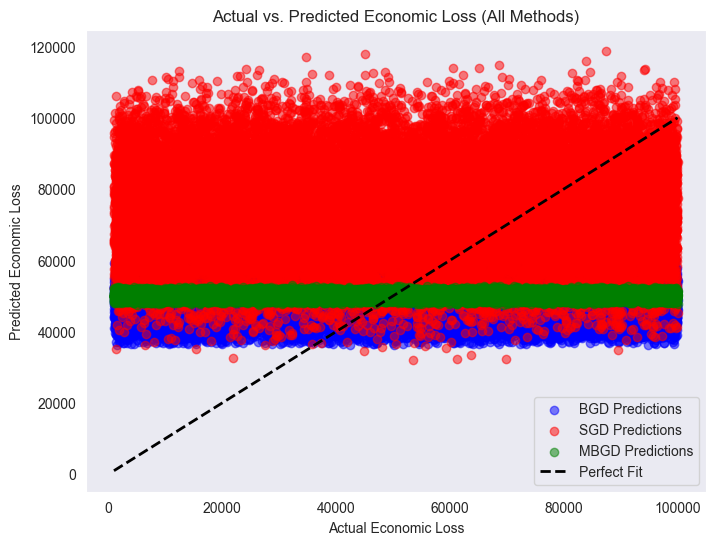

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plots for each method
plt.scatter(y_test, y_pred_test_bgd, color='b', alpha=0.5, label="BGD Predictions")
plt.scatter(y_test, y_pred_test_sgd, color='r', alpha=0.5, label="SGD Predictions")
plt.scatter(y_test, y_pred_test_mbgd, color='g', alpha=0.5, label="MBGD Predictions")

# Reference line (Perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")

plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs. Predicted Economic Loss (All Methods)")
plt.legend()
plt.grid()
plt.show()


# **Evaluations**  

### **Comparison of Gradient Descent Methods**  

1. **Batch Gradient Descent (BGD)**  
   - Produces stable weight updates but converges slowly.  
   - Test MSE: **842M** (higher than Mini-Batch).  

2. **Stochastic Gradient Descent (SGD)**  
   - Updates weights frequently, leading to high variance.  
   - Test MSE: **1559M** (worst performance, unstable).  

3. **Mini-Batch Gradient Descent (MBGD)**  
   - Balances stability and speed.  
   - Test MSE: **816M** (best performance).  
   - Small batch sizes (16, 32, 64) yield similar results.  


---

### **Interpreting Model Coefficients (Feature Importance)**  

1. **Bias Term (Intercept)**  
   - The base prediction when all other features are zero (26,617 for Mini-Batch GD).  

2. **Top Positive Influencers:**  
   - **Medical Cost (972 - 3,889)** → Strongest predictor.  
   - **Insurance Claims (1,868 - 3,046)** → Significant impact.  
   - **Traffic Volume (3,642 - 9,387)** → Higher traffic increases predictions.  
   - **Speeding (4,051 - 5,612)** → One of the most influential features.  

3. **Moderate Impact Features:**  
   - **Driver Age Group (1,659 - 4,229), Vehicle Condition (2,068 - 2,703)** → Moderate influence.  
   - **Country Features** → Regional differences in impact.  

4. **Lower or Inconsistent Influence:**  
   - **Weather (-1,457 to 5,612), Mechanical Failure (-1,338 to 5,140), Urban/Rural (-600 to 2,736).**  

**Conclusion:** Medical Cost, Insurance Claims, Traffic Volume, and Speeding are the most influential predictors, while weather, mechanical failure, and location have less impact.  

---

### **Advantages & Disadvantages of Each Gradient Descent Variant**  

#### **1. Batch Gradient Descent (BGD)**  
**Advantages:**  
- Stable updates, converges smoothly.  

**Disadvantages:**  
- Slow, high memory usage, and higher Test MSE (842M).  

#### **2. Stochastic Gradient Descent (SGD)**  
**Advantages:**  
- Fast updates, works well for large datasets.  

**Disadvantages:**  
- High variance, poor generalization (Test MSE: 1559M).  

#### **3. Mini-Batch Gradient Descent (MBGD)**  
**Advantages:**  
- Balances stability and efficiency, lowest Test MSE (816M).  

**Disadvantages:**  
- Performance depends on batch size selection.  

**Conclusion:** Mini-Batch GD is the best choice for this dataset, balancing speed, stability, and generalization.